# Linear Regression

This notebook shows how linear regression is preformed using python and numpy.

First we start by importing numpy for matrix computations, pyplot for plotting and our own data reading method.
We do also set the seed so our expiriments will be reproducable.

The aim of the linear regression is to find the "best" line to predict the output variable $Y$ from the input variables
$X$.

$$\hat{Y} = X * W + b$$

In [1]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
from ReadData import get_house_data

np.random.seed(12345)


In [2]:

m1 = np.matrix(
    [[3,2],
     [3,2]])

m2 = np.matrix(
    [[1,2],
     [2,1]])


print(np.dot(m1, m2))
print(m1 * m2)

[[7 8]
 [7 8]]
[[7 8]
 [7 8]]


In [3]:

m1 = np.asarray(
    [[3,2],
     [3,2]])

m2 = np.asarray(
    [[1,2],
     [2,1]])


print(np.dot(m1, m2))
print(m1 * m2)

[[7 8]
 [7 8]]
[[3 4]
 [6 2]]


## Normalization

In all regression problems it is a good idea to normalize all data. Therefore we need to create a function for normalization.

In [4]:
# Normalize each column ("attribute") of a given matrix.
# The normalization is done so that each column of the output matrix
# have 0 mean and unit standard diviation.
def normalize(x):
    return (x - np.mean(x,0)) / np.std(x,0)



## Cost function
In most data mining problems we specify a cost function where the aim is to minimize the cost function.
In linear regression the most common cost function is the mean squared error (MSE).
$$ cost(Y, \hat{Y}) = \frac{1}{2m}\sum_{i = 0}^m (y_i-\hat{y_i})^2 $$

In [5]:
# The cost function
def cost(Y, Yhat):
    m = np.shape(Y)[0]
    return 1 / (2.0 * m) * np.sum((Y - Yhat) ** 2)


To be able to find the minimal cost with gradient decent we need to calculate the gradients of the cost function with
respect to the weights and the bias.

$$ \frac{\partial cost}{\partial w} = \frac{1}{m}\sum_{i = 0}^m -x_i * (y_i-(x_i * w + b))$$
$$ \frac{\partial cost}{\partial b} = \frac{1}{m}\sum_{i = 0}^m -1 * (y_i-(x_i * w + b)) $$

In [6]:
# The gradients of the cost function
def d_cost(Y, X, W, b):
    m = np.shape(Y)[0]
    Yhat = np.dot(X, W) + b
    dW = 1.0 / (m) * np.sum(-X * (Y - Yhat))
    db = 1.0 / (m) * np.sum(-1 * (Y - Yhat))
    return (dW, db)




## Reading the data

The data are read into two variables.
X will be the living area of a given house and Y will be the selling price of that given house.
Even if linear regression is a very simple model and is impossible to overfit we will save some data for testing.

In [7]:
# Read all data
X = get_house_data()[:,[1]]
Y = get_house_data()[:,[3]]


# Normalize the data
X = normalize(X)
Y = normalize(Y)


# Split the data into a train- and a test-set
testing = np.random.uniform(0, 1, size=(np.shape(X)[0])) <= 0.25

X_test = X[testing,:]
Y_test = Y[testing,:]

X = X[np.logical_not(testing),:]
Y = Y[np.logical_not(testing),:]


## Initial guess for the parameters

Here we set the initial values for the parameters and the learning rate $\alpha$.

In [8]:

W = np.random.uniform(low=-10, high=10, size=(1,1))
b = 0.0

alpha = 0.01



## The main program

Here we optimize the cost function using gradient decent.
The cost for the train- and the test-set at each step is stored for later use.

In [9]:
energy = []
energy_test = []



for i in range(500):
    
    Y_hat = np.dot(X, W) + b
    Y_hat_test = np.dot(X_test, W) + b
    
    energy.append(cost(Y, Y_hat))
    energy_test.append(cost(Y_test, Y_hat_test))
    dW, db = d_cost(Y, X, W, b)
    W -= alpha * dW
    b -= alpha * db
    



## Plotting the results

Here we use pyplot to show the line that we found

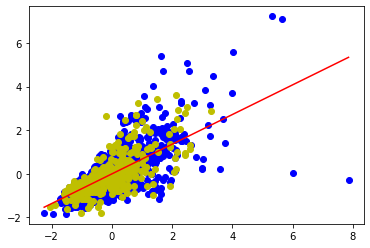

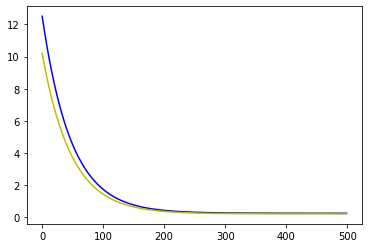

In [10]:
x_line = [[np.min(X)],[np.max(X)]]
y_line = x_line * W + b


plt.plot(X, Y, 'bo', X_test, Y_test, 'yo', x_line, y_line, 'r-')
plt.show()

plt.plot(energy, 'b-', energy_test, 'y-')
plt.show()

## Linear regression with multiple input attributes

In [11]:


# Read all data
X = get_house_data()[:,:2]
Y = get_house_data()[:,[3]]


# Normalize the data
X = normalize(X)
Y = normalize(Y)


# Split the data into a train- and a test-set
testing = np.random.uniform(0, 1, size=(np.shape(X)[0])) <= 0.25

X_test = X[testing,:]
Y_test = Y[testing,:]

X = X[np.logical_not(testing),:]
Y = Y[np.logical_not(testing),:]



# Set initial parameters
W = np.random.uniform(low=-1, high=1, size=(2,1))
b = 0.0

alpha = 0.005


energy = []
energy_test = []


# Preform gradient decent
for i in range(200):
    
    Y_hat = np.dot(X, W) + b
    Y_hat_test = np.dot(X_test, W) + b
    
    energy.append(cost(Y, Y_hat))
    energy_test.append(cost(Y_test, Y_hat_test))
    dW, db = d_cost(Y, X, W, b)
    W -= alpha * dW
    b -= alpha * db
    



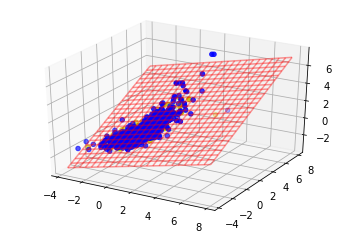

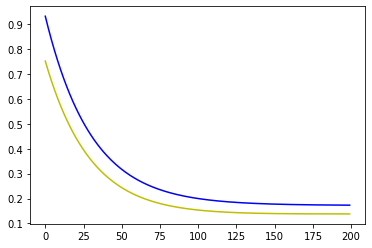

In [12]:
from mpl_toolkits.mplot3d import axes3d


# Plot the result
x1 = np.arange(np.min(X),np.max(X), 0.05)
x2 = np.arange(np.min(X),np.max(X), 0.05)

x1, x2 = np.meshgrid(x1,x2)


@np.vectorize
def func(x1,x2):
    return x1 * W[0] + x2 * W[1] + b

func(x1, x2)


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x1, x2, func(x1, x2), rstride=10, cstride=10, color='r', alpha=0.4)
ax.scatter3D(X[:,0], X[:,1], Y, color='b')
ax.scatter3D(X_test[:,0], X_test[:,1], Y_test, color='y')
plt.show()



plt.plot(energy, 'b-', energy_test, 'y-')
plt.show()


In [13]:
print("The price of the house is given by the formula: x1*{0:.3f} + x2*{1:.3f}".format(*W[:,0]))

The price of the house is given by the formula: x1*0.325 + x2*0.578
